# <font color="purple">Concours des prix des logements - Machine Learning</font>

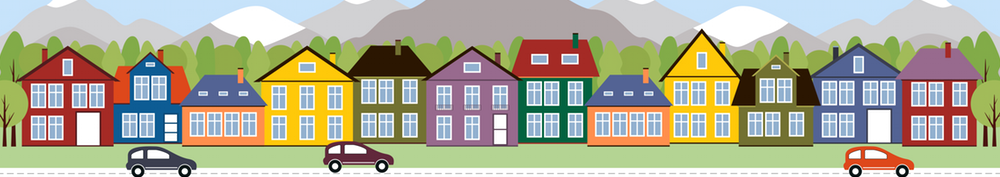

> Demandez à un acheteur de décrire la maison de ses rêves, et il ne commencera probablement pas par la hauteur du plafond du sous-sol ou la proximité d'un chemin de fer est-ouest ... 

Avec **79 variables explicatives** décrivant *(presque)* tous les aspects des maisons résidentielles à Ames, Iowa, le défi de ce concours est de prédire le prix final de chaque maison.

In [129]:
# Importation des librairies nécessaires et visualisation des fichiers disponibles

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## <font color="orange">Preprocessing - Préparation des données</font>

Importation des fichiers **Train** et **Test** de l'exercice :

In [130]:
sample_submission = pd.read_csv(r"sample_submission.csv")
test = pd.read_csv(r"test.csv")
train = pd.read_csv(r"train.csv")

#création d'une copie de chaque dataset
test_copy  = test.copy()
train_copy  = train.copy()

Visualisation des premieres lignes :

Comme on le constate, il y a 81 colonnes dans notre dataset, donc bien **79 variables** *(features)*, 1 colonne ID et notre variable cible qui sera ici **"SalePrice"**.

La variable ID pourrait être supprimée mais nous en aurons besoin pour soumettre les résultats. Nous allons à présent regrouper nos 2 datasets train et test *(en ajoutant une variable pour les identifier ensuite)* et faire une rapide description des données :

In [131]:
train_copy['train']  = 1
test_copy['train']  = 0
data_full = pd.concat([train_copy, test_copy], axis=0,sort=False)
better_df = data_full.copy()

In [132]:
better_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890,0.500171
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883,0.500086
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,1.000000


In [133]:
better_df.info()
better_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Id             -0.021917
Name: SalePrice, dtype: float64 



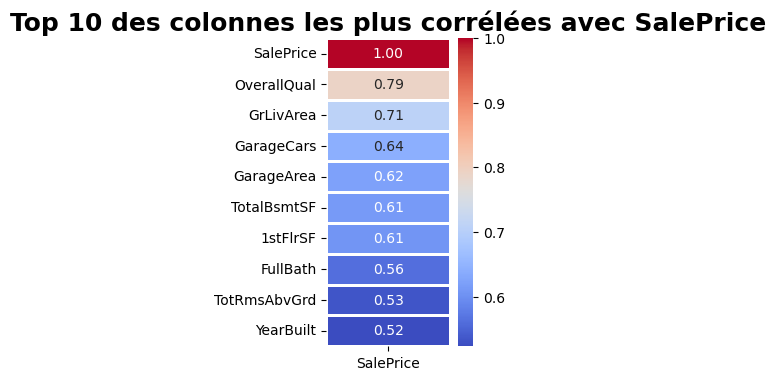

In [146]:
# Convert categorical columns to numerical values
better_df_numeric = better_df.select_dtypes(include=['number'])
better_df_categorical = better_df.select_dtypes(include=['object'])
better_df_categorical = better_df_categorical.apply(lambda x: x.astype('category').cat.codes)
better_df_encoded = pd.concat([better_df_numeric, better_df_categorical], axis=1)

# Calculate correlation matrix
correlation = better_df_encoded.corr()
correlation = correlation["SalePrice"].sort_values(ascending=False)
print(correlation.head(78), "\n")

# Heatmap of the top 10 correlated features with SalePrice with blue color
plt.figure(figsize=(2, 4))
sns.heatmap(correlation.to_frame().head(10), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.xticks(rotation=0)
plt.title("Top 10 des colonnes les plus corrélées avec SalePrice", weight='bold', fontsize=18)
plt.show()


In [135]:
# count the null values of the top 10 columns correlated with SalePrice
null_values = better_df_encoded[["SalePrice","OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"]].isnull().sum()
print(null_values, "\n")

SalePrice       1459
OverallQual        0
GrLivArea          0
GarageCars         1
GarageArea         1
TotalBsmtSF        1
1stFlrSF           0
FullBath           0
TotRmsAbvGrd       0
YearBuilt          0
dtype: int64 



In [136]:
# conserver uniquement LotArea, OverallQual, YearBuilt, 1stFlrSF, 2ndFlrSF dans better_df

better_df = better_df[["Id","SalePrice","OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"]]
better_df.head()

,Id,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,1,208500.0,7,1710,2.0,548.0,856.0,856,2,8,2003
1,2,181500.0,6,1262,2.0,460.0,1262.0,1262,2,6,1976
2,3,223500.0,7,1786,2.0,608.0,920.0,920,2,6,2001
3,4,140000.0,7,1717,3.0,642.0,756.0,961,1,7,1915
4,5,250000.0,8,2198,3.0,836.0,1145.0,1145,2,9,2000


### <font color="blue">Features engineering</font>

Comme nous l'avons constaté grâce à la fonction .info(), nous avons dans notre dataset **un certain nombre de variables catégoriques *(categorical features)***.    
Ces variables ne pourrons pas être traitées par notre modèle de prédiction, il va donc falloir les traiter différement.

Réalisons cette séparation et comptons le nombre de Null de chaque variable.

In [137]:
better_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   SalePrice     1460 non-null   float64
 2   OverallQual   2919 non-null   int64  
 3   GrLivArea     2919 non-null   int64  
 4   GarageCars    2918 non-null   float64
 5   GarageArea    2918 non-null   float64
 6   TotalBsmtSF   2918 non-null   float64
 7   1stFlrSF      2919 non-null   int64  
 8   FullBath      2919 non-null   int64  
 9   TotRmsAbvGrd  2919 non-null   int64  
 10  YearBuilt     2919 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 273.7 KB


In [138]:
categorical_features = better_df.select_dtypes(include=['object'])
numerical_features = better_df.select_dtypes(exclude=['object'])

In [140]:
# Variables catégoriques :
print("Nombre de variables catégorielles :",categorical_features.shape[1])
print("\nNombre de valeurs nulles :\n",categorical_features.isnull().sum())

# Variables numériques :
print("\nNombre de variables numériques :",numerical_features.shape[1])
print("\nNombre de valeurs nulles :\n",numerical_features.isnull().sum())

Nombre de variables catégorielles : 0

Nombre de valeurs nulles :
 Series([], dtype: float64)

Nombre de variables numériques : 11

Nombre de valeurs nulles :
 Id                 0
SalePrice       1459
OverallQual        0
GrLivArea          0
GarageCars         1
GarageArea         1
TotalBsmtSF        1
1stFlrSF           0
FullBath           0
TotRmsAbvGrd       0
YearBuilt          0
dtype: int64


Nous allons utiliser **la médiane de ces variables** pour compléter les valeurs nulles. Pour les autres variables, les valeurs nulles seront complétées à 0.

In [144]:
# compléter les nan avec la médianne hormis pour saleprice
better_df['GarageCars'].fillna(better_df['GarageCars'].median(), inplace=True)
better_df['GarageArea'].fillna(better_df['GarageArea'].median(), inplace=True)

In [145]:
numerical_features = numerical_features.fillna(0)
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   SalePrice     2919 non-null   float64
 2   OverallQual   2919 non-null   int64  
 3   GrLivArea     2919 non-null   int64  
 4   GarageCars    2919 non-null   float64
 5   GarageArea    2919 non-null   float64
 6   TotalBsmtSF   2919 non-null   float64
 7   1stFlrSF      2919 non-null   int64  
 8   FullBath      2919 non-null   int64  
 9   TotRmsAbvGrd  2919 non-null   int64  
 10  YearBuilt     2919 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 273.7 KB


A présent, les données ont été complétées, les variables ne comportes plus de null et pourront donc être utilisées pour nos modélisations.

Nous allons à présent **convertir nos categorical features en données numériques** pour pouvoir les utiliser dans nos modèles puis réaliser une feature selection avec Scikit Learn.

In [24]:
for col in categorical_features.columns:
    #Conversion du type de variable en variable catégorique
    categorical_features[col] = categorical_features[col].astype('category')
    categorical_features[col] = categorical_features[col].cat.codes
categorical_features.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,3,1,2,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,5,1,2,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,5,1,2,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,3,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,5,1,2,5,5,2,8,4


Pour la suite du process, nous allons combiner les 2 dataframes *(categorical et numerical features)*, puis les spliter à nouveau en Train et Test

In [25]:
df_final = pd.concat([numerical_features,categorical_features], axis=1,sort=False)
final_train = df_final[df_final['train'] == 1]
final_train = final_train.drop(['train',],axis=1)

final_test = df_final[df_final['train'] == 0]
final_test = final_test.drop(['SalePrice'],axis=1)
final_test = final_test.drop(['train',],axis=1)

## <font color="orange">Features selection - Analyse des correlations</font>

Nous allons à présent pouvoir, sur le jeu Train, analyser les variables les plus corrélées à SalePrice et réaliser une feature selection pour ne garder que les meilleures :

In [26]:
final_train = final_train.drop(["Id"],axis=1)

In [27]:
corr_train = final_train.corr()

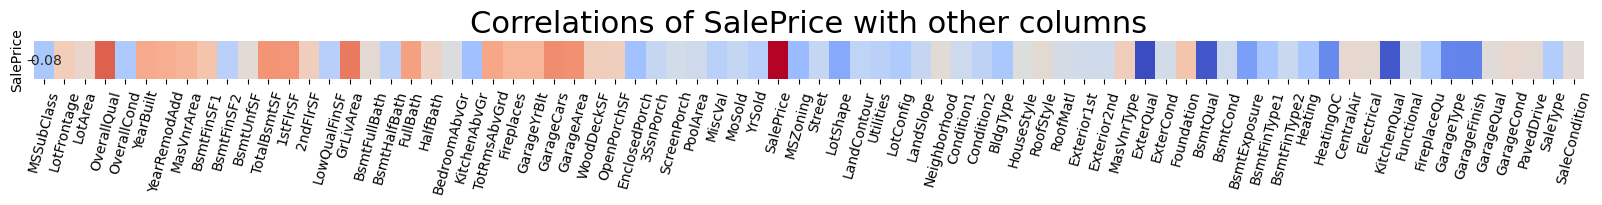

In [77]:
# Filter the correlation matrix to include only the "SalePrice" row
corr_saleprice = corr_train.loc[["SalePrice"], :]

# Create the heatmap using Seaborn, displaying only the correlations of "SalePrice"
fig, ax = plt.subplots(figsize=(20, 0.5))
sns.heatmap(corr_saleprice, cmap="coolwarm", annot=True, fmt=".2f", cbar=False)
ax.set_title("Correlations of SalePrice with other columns", fontsize=22)
plt.xticks(rotation=75)
plt.show()

Nous pouvons visualiser les variables avec un **coefficient de corrélation linéaire à SalePrice non significatif**, nous pourrons éliminer ces variables ensuite :

In [29]:
nocorr_features = list(corr_train[corr_train['SalePrice']<0.2].index)
nocorr_features

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleType']

In [30]:
final_train = final_train.drop(nocorr_features, axis=1)
final_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Neighborhood,RoofStyle,MasVnrType,Foundation,CentralAir,Electrical,GarageQual,GarageCond,PavedDrive,SaleCondition
0,65.0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,...,5,1,1,2,1,4,5,5,2,4
1,80.0,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,...,24,1,1,1,1,4,5,5,2,4
2,68.0,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,...,5,1,1,2,1,4,5,5,2,4
3,60.0,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,...,6,1,1,0,1,4,5,5,2,0
4,84.0,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,...,15,1,1,2,1,4,5,5,2,4


Il nous reste à présent 31 variables dans notre dataset final. 

## <font color="orange">Modèlisation par régression linéaire</font>

Pour nos modèles de régression linéaire, nous allons prendre en compte cette fois les variables avec les meilleurs coeffiscients de corrélation linéaires.

In [31]:
rl_features = list(corr_train[corr_train['SalePrice']>0.3].index)
rl_features.remove("SalePrice")
rl_features

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MasVnrType',
 'Foundation']

In [32]:
Y_train = final_train["SalePrice"]
X_train = final_train.drop(["SalePrice"],axis=1)
X_train = X_train[rl_features]

### <font color="blue">Split des données</font>

In [33]:
from sklearn.model_selection import train_test_split
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)

In [34]:
y_train_rl = y_train_rl.values.reshape(-1,1)
y_test_rl = y_test_rl.values.reshape(-1,1)

### <font color="blue">Standardisation des données</font>

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_rl = sc.fit_transform(X_train_rl)
X_test_rl = sc.fit_transform(X_test_rl)
y_train_rl = sc.fit_transform(y_train_rl)
y_test_rl = sc.fit_transform(y_test_rl)

### <font color="blue">Première régression linéaire</font>

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_rl,y_train_rl)

LinearRegression()

In [37]:
print("Intercept :",lm.intercept_)
print("Coefficients :",lm.coef_)
print("R² du modèle :",round(lm.score(X_train_rl,y_train_rl),2))

Intercept : [-2.6057113e-17]
Coefficients : [[-0.01032872  0.32374481  0.04568185  0.09653476  0.06795343  0.08268081
   0.06223981  0.02875002 -0.01478573  0.17480027  0.01126208  0.08366046
   0.0823512  -0.02547341  0.13048557  0.01418568  0.06417218  0.01864099
   0.0318834   0.0301061 ]]
R² du modèle : 0.77


In [38]:
pred_rl = lm.predict(X_test_rl)
pred_rl = pred_rl.reshape(-1,1)

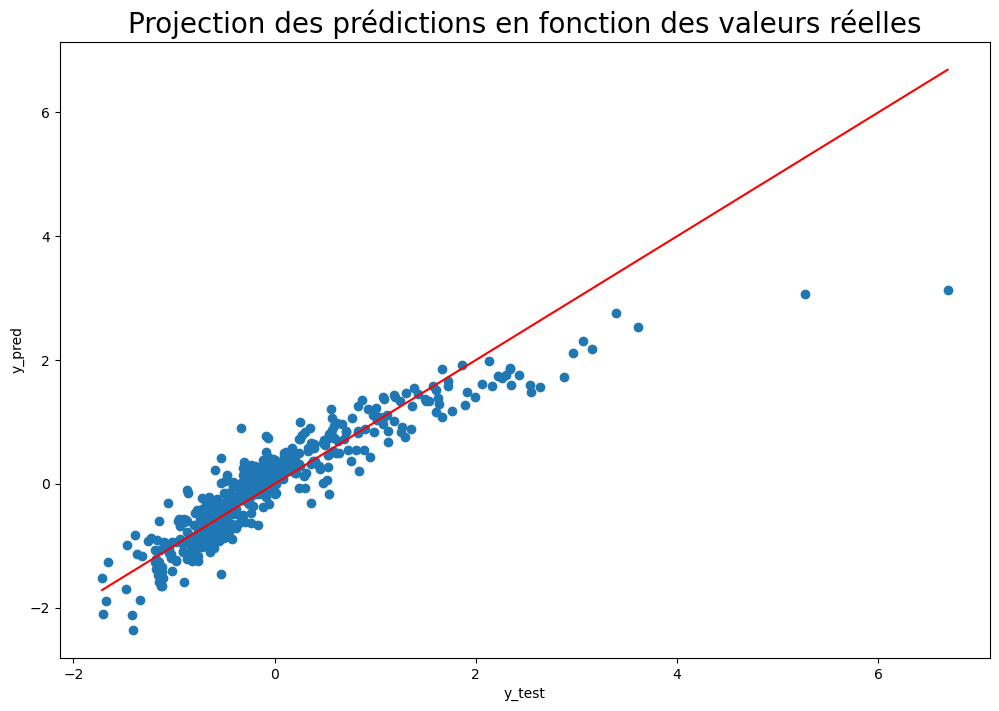

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test_rl, pred_rl)
ax.plot([y_test_rl.min(), y_test_rl.max()], [y_test_rl.min(), y_test_rl.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

### <font color="blue">Calcul des métriques de performances</font>

In [40]:
#Fonction de calculs des metriques importantes MAE, MSE, MAPE, RMSE
def metrics_timeseries(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(diff / y_true)) * 100
    dict_metrics = {"Métrique":["MAE", "MSE", "RMSE", "MAPE"], "Résultats":[mae, mse, rmse, mape]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [41]:
metrics_rl = metrics_timeseries(y_test_rl, pred_rl)
metrics_rl

,Métrique,Résultats
0,MAE,0.282827
1,MSE,0.159615
2,RMSE,0.399519
3,MAPE,248.646843


Notre premier modèle de régression linéaire nous ayant fourni les premières métriques, **nous allons pouvoir tester d'autres modélisations telles que RandomForest** et comparer les résultats obtenus.

## <font color="orange">Modèlisation par Random Forest</font>

Nous allons travailler sur les 31 features sélectionnées auparavant en repartant de notre dataframe final_train et réaliser une sélection de variable via un transformer recursif :

In [42]:
Y_rf = final_train["SalePrice"]
X_rf = final_train.drop(["SalePrice"],axis=1)

### <font color="blue">Sélection des variables *(RFECV)*</font>

In [45]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor


In [46]:
selector = RFECV(RandomForestRegressor(), min_features_to_select=5, step=1, cv=5)
selector.fit(X_rf,Y_rf)

RFECV(cv=5, estimator=RandomForestRegressor(), min_features_to_select=5)

In [49]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True])

In [ ]:
selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  2,  4,  1,  1,
        1,  1,  1,  1,  1,  1,  3,  6,  1, 10,  7,  8,  9,  1])

In [50]:
best_features_rf = list(np.array(X_rf.columns)[selector.support_])
best_features_rf

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'Neighborhood',
 'RoofStyle',
 'MasVnrType',
 'CentralAir',
 'SaleCondition']

Nous avons à présent défini les meilleurs variables pour notre RandomForest, nous allons à présent tester itérativement les paramètres importants de notre modèle pour définir les meilleurs :

In [51]:
X_rf = X_rf[best_features_rf]

In [52]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, Y_rf, test_size=0.3, random_state=1)
y_train_rf = y_train_rf.values.reshape(-1,1)
y_test_rf = y_test_rf.values.reshape(-1,1)

Utilisation de GridSearchCV pour sélectionner les meilleurs paramètres :

In [53]:
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

param_grid_rf = { 'n_estimators' : [10,50,100,150,200], 'max_features' : ['auto', 'sqrt']}
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [54]:
print ("Score final : ", round(grid_search_rf.score(X_train_rf, y_train_rf) *100,4), " %")
print ("Meilleurs parametres: ", grid_search_rf.best_params_)
print ("Meilleure config: ", grid_search_rf.best_estimator_)

Score final :  97.6211  %
Meilleurs parametres:  {'max_features': 'auto', 'n_estimators': 200}
Meilleure config:  RandomForestRegressor(max_features='auto', n_estimators=200)


Notre meilleur modèle à présent défini, nous allons modéliser avec ces paramètres et éditer les métriques :

In [55]:
rf =  RandomForestRegressor(max_features='sqrt', n_estimators=150)
rf.fit(X_train_rf, y_train_rf)

RandomForestRegressor(max_features='sqrt', n_estimators=150)

In [56]:
pred_rf = rf.predict(X_test_rf)
pred_rf = pred_rf.reshape(-1,1)

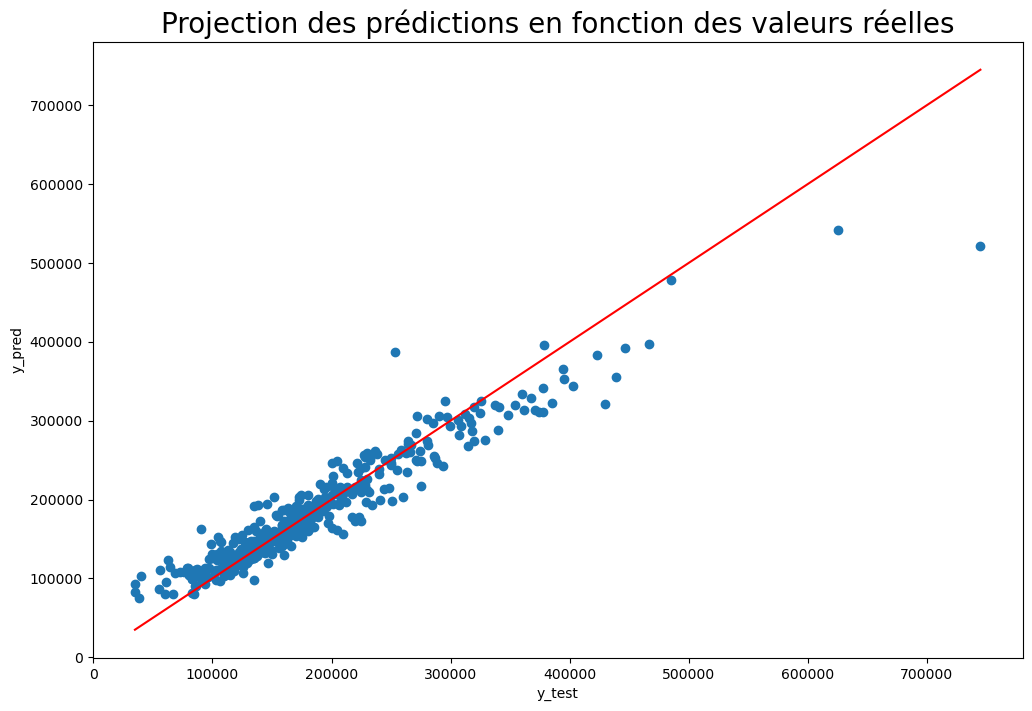

In [57]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test_rf, pred_rf)
ax.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

In [58]:
metrics_rf = metrics_timeseries(y_test_rf, pred_rf)
metrics_rf

,Métrique,Résultats
0,MAE,1.764761e+04
1,MSE,7.100834e+08
2,RMSE,2.664739e+04
3,MAPE,1.176658e+01


In [59]:
# Afin de comparer les métriques, on inverse la standardisation de la régression linéaire
metrics_rl_i = metrics_timeseries(sc.inverse_transform(y_test_rl), sc.inverse_transform(pred_rl))
metrics_rl_i

,Métrique,Résultats
0,MAE,2.389896e+04
1,MSE,1.139700e+09
2,RMSE,3.375945e+04
3,MAPE,1.527760e+01


Les métriques du modèle RandomForest sont donc meilleures que celles de la régression linéaire.    
**Nous allons donc utiliser ce dernier modèle pour notre prédiction sur le fichier sample_submission fourni**.

## <font color="orange">Prédiction du prix des maison du fichier sample_submission</font>

In [60]:
id_test = final_test["Id"]
X_pred_test = final_test[best_features_rf]

In [61]:
pred_rf = rf.predict(X_pred_test)
pred_rf = pred_rf.reshape(-1,1)
pred_rf

array([[127663.49333333],
       [155080.        ],
       [182492.25333333],
       ...,
       [171771.92666667],
       [120053.72      ],
       [239254.06      ]])

In [62]:
df_submission = pd.concat([id_test,pd.Series(pred_rf[:,0])],axis=1).rename(columns={0:"SalePrice"})
df_submission

,Id,SalePrice
0,1461,127663.493333
1,1462,155080.000000
2,1463,182492.253333
3,1464,184429.886667
4,1465,187981.153333
...,...,...
1454,2915,82275.333333
1455,2916,88915.893333
1456,2917,171771.926667
1457,2918,120053.720000


In [63]:
df_submission.to_csv('submission.csv', index=False)